In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from skimage import io
from skimage.measure import label, regionprops, regionprops_table

In [6]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))
from utils import *
from polarisation import *

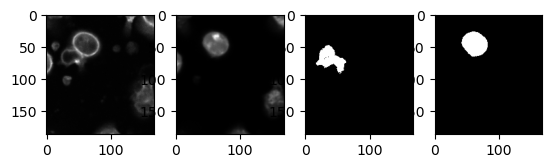

In [7]:
path = "data/interaction/"

image_tcell = io.imread(path+"Pos6_image_tcell.tif")
image_cancer = io.imread(path+"Pos6_image_cancer.tif")
mask_tcell = io.imread(path+"Pos6_mask_tcell.tif")
mask_tcell = (mask_tcell < 255).astype(int)
mask_tcell = np.logical_not(mask_tcell).astype(int)
mask_cancer = io.imread(path+"Pos6_mask_cancer.tif")
mask_cancer = (mask_cancer < 255).astype(int)
mask_cancer = np.logical_not(mask_cancer).astype(int)

T = 20
fig, ax = plt.subplots(1,4)
ax[0].imshow(image_tcell[T,:,:], cmap='gray')
ax[1].imshow(image_cancer[T,:,:], cmap='gray')
ax[2].imshow(mask_tcell[T,:,:], cmap='gray')
ax[3].imshow(mask_cancer[T,:,:], cmap='gray')
plt.show()

## Overlap

In [90]:
# Condition 1 : Overlap percentage
# @dev, depends on the segmentation

def is_overlaping(mask_cancer, mask_tcell, overlap_threshold=0.2, display=True):
    overlap = np.logical_and(mask_cancer, mask_tcell)
    num_overlap_pixels = np.sum(overlap)
    overlap_percentage = num_overlap_pixels / np.sum(mask_cancer)

    if display:
        print(1-overlap_percentage)

    if overlap_percentage > 1-overlap_threshold:
        return True
    else : 
        return False
    
is_overlaping(mask_cancer[T,:,:], mask_tcell[T,:,:])


1.0


False

## Distance

In [ ]:
# Are they stuck together ?
def is_in_contact(mask_cancer, mask_tcell, error_margin=0.2):
    # Get properties of segmented cell mask
    properties_cancer = regionprops_table(mask_cancer, properties = ('Centroid', 'BoundingBox', 'EquivDiameter'))
    properties_tcells = regionprops_table(mask_tcell, properties = ('Centroid', 'BoundingBox', 'EquivDiameter'))

    # Get the centroids of the cancer and T cell
    centroid_cancer = [properties_cancer['Centroid-0'][0], properties_cancer['Centroid-1'][0]]
    centroid_tcell = [properties_tcells['Centroid-0'][0], properties_tcells['Centroid-1'][0]]

    # Calculate the distance between the centroids
    centroid2centroid_distance = distance(centroid_cancer, centroid_tcell)
    
    # Check if they are in contact
    if centroid2centroid_distance < (1+error_margin)*((properties_cancer['EquivDiameter'][0]+properties_tcells['EquivDiameter'][0])/2):
        return True
    else:
        return False

is_in_contact(mask_cancer[T,:,:], mask_tcell[T,:,:])

True

## Alignment

20.734518858213235


20.734518858213235

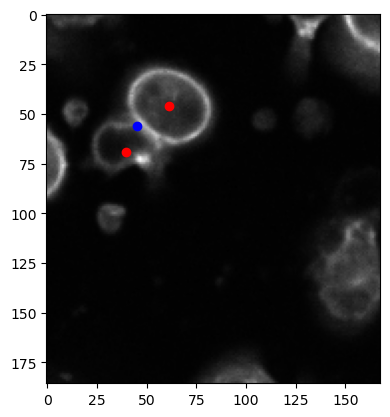

In [8]:
compute_alignement(image_cancer[T,:,:], image_tcell[T,:,:], mask_cancer[T,:,:], mask_tcell[T,:,:], display=True)    

19.76615653124349
10.267309879748696
10.580404585468155
6.886853516659585
9.71000928354477
14.712678715224612
39.71541512334925
7.540239739994663
9.587788086754308
42.04376571272671
41.59758419762976
16.50058914147
2.441241673109126
14.521932458244404
12.949422899365981
1.2905940195181431
37.01931102716645
27.07329415217883
34.88415213240551
16.042001403713723
20.734518858213235
56.928863158085285
57.982853824043595
58.860736816155836
33.641881855286336
51.88543176375407
27.50676241553943
122.49346687889273
37.34249038390058
39.12556882209252
34.74029823312912


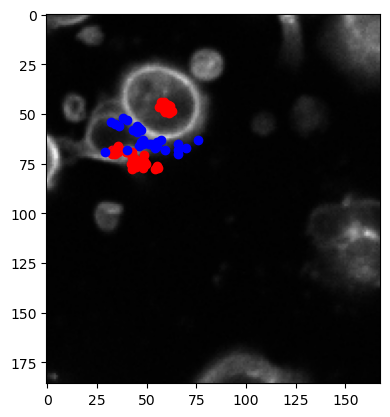

In [9]:
# Loop over time points
for t in range(len(image_cancer)):
    compute_alignement(image_cancer[t,:,:], image_tcell[t,:,:], mask_cancer[t,:,:], mask_tcell[t,:,:], display=True)    

In [ ]:
movie = []
for t in range(len(image_cancer)):
    fig, ax = plt.subplots()
    compute_alignement(image_cancer[t, :, :], image_tcell[t, :, :], mask_cancer[t, :, :], mask_tcell[t, :, :], display=True)
    
    ax.axis('off')
    fig.canvas.draw()

    # Get the RGBA buffer from the figure
    img_array = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
    img_array = img_array.reshape(fig.canvas.get_width_height()[::-1] + (4,))

    # Convert RGBA to RGB by removing the alpha channel
    img_array = img_array[:, :, 1:]  # Remove the alpha channel

    # Convert the NumPy array to an Image
    img = Image.fromarray(img_array)
    movie.append(img)

    plt.close(fig)  # Close the figure to free up memory

# Save the movie as a TIFF
if movie:
    movie[0].save(
        "polarisation_movie.tiff", 
        save_all=True,
        append_images=movie[1:],
        duration=200,  # Duration between frames in milliseconds
        loop=0
    )
else:
    print("No frames to save.")

19.76615653124349
10.267309879748696
10.580404585468155
6.886853516659585
9.71000928354477
14.712678715224612
39.71541512334925
7.540239739994663
9.587788086754308
42.04376571272671
41.59758419762976
16.50058914147
2.441241673109126
14.521932458244404
12.949422899365981
1.2905940195181431
37.01931102716645
27.07329415217883
34.88415213240551
16.042001403713723
20.734518858213235
56.928863158085285
57.982853824043595
58.860736816155836
33.641881855286336
51.88543176375407
27.50676241553943
122.49346687889273
37.34249038390058
39.12556882209252
34.74029823312912
